In [74]:
import numpy as np
import pandas as pd
import sys, os
import json
sys.path.append('../processing/')
from querying_tools import matching_tools
import matplotlib.pyplot as plt

In [2]:
mtools = matching_tools('../data','../data','../data')
mtools.loadSent()

In [3]:
with open('../data/query-3.txt', 'r') as f:
    raw_query = f.read()
f.close()

query = [json.loads(q) for q in raw_query.split('\n')]

In [178]:
testq = query[111]
print(testq)

{'title': 'major gods in greek mythology', 'qid': 'C085|3|1', 'entities': ['artemis', 'zeus', 'poseidon']}


In [179]:
mlist_1 = mtools.entityMentioned(testq['entities'][0].replace('_', ' '))
mlist_2 = mtools.entityMentioned(testq['entities'][1].replace('_', ' '))
mlist_3 = mtools.entityMentioned(testq['entities'][2].replace('_', ' '))

In [180]:
mention_parsed_1 = mtools.parseMentions(mlist_1)
mention_parsed_2 = mtools.parseMentions(mlist_2)
mention_parsed_3 = mtools.parseMentions(mlist_3)

In [181]:
tol_1 = len(mlist_1)
doc_perc_1 = {}
for doc in mention_parsed_1.keys():
    doc_men = 0
    for sent in mention_parsed_1[doc].keys():
        doc_men += len(mention_parsed_1[doc][sent])
    doc_perc_1.update({doc:doc_men/tol_1})

tol_2 = len(mlist_2)
doc_perc_2 = {}
for doc in mention_parsed_2.keys():
    doc_men = 0
    for sent in mention_parsed_2[doc].keys():
        doc_men += len(mention_parsed_2[doc][sent])
    doc_perc_2.update({doc:doc_men/tol_2})
    
tol_3 = len(mlist_3)
doc_perc_3 = {}
for doc in mention_parsed_3.keys():
    doc_men = 0
    for sent in mention_parsed_3[doc].keys():
        doc_men += len(mention_parsed_3[doc][sent])
    doc_perc_3.update({doc:doc_men/tol_3})

In [182]:
doc_list_1 = mtools.key2Text(mlist_1)
doc_list_2 = mtools.key2Text(mlist_2)
doc_list_3 = mtools.key2Text(mlist_3)

In [183]:
related_ent_1 = set(','.join(doc_list_1.mentioned.values.tolist()).split(','))
related_ent_2 = set(','.join(doc_list_2.mentioned.values.tolist()).split(','))
related_ent_3 = set(','.join(doc_list_3.mentioned.values.tolist()).split(','))
related_inter = related_ent_1.intersection(related_ent_2).intersection(related_ent_3)

In [184]:
print(len(related_ent_1), len(related_ent_2), len(related_ent_3), len(related_inter))

3274 5390 2749 618


In [185]:
related_freq_1 = dict.fromkeys(related_inter,0)
related_freq_2 = dict.fromkeys(related_inter,0)
related_freq_3 = dict.fromkeys(related_inter,0)
for ent in testq['entities']:
    related_freq_1.pop(str(mtools.entity2id[ent.replace('_', ' ')]), None)
    related_freq_2.pop(str(mtools.entity2id[ent.replace('_', ' ')]), None)
    related_freq_3.pop(str(mtools.entity2id[ent.replace('_', ' ')]), None)

for index, row in doc_list_1.iterrows():
    doc_weight = doc_perc_1[row.did]
    for eid in row.mentioned.split(','):
        if eid in related_freq_1.keys():
            related_freq_3[eid] += doc_weight

for index, row in doc_list_2.iterrows():
    doc_weight = doc_perc_2[row.did]
    for eid in row.mentioned.split(','):
        if eid in related_freq_2.keys():
            related_freq_3[eid] += doc_weight
            
for index, row in doc_list_3.iterrows():
    doc_weight = doc_perc_3[row.did]
    for eid in row.mentioned.split(','):
        if eid in related_freq_3.keys():
            related_freq_3[eid] += doc_weight

sorted_freq_1 = sorted([[k,v] for k, v in related_freq_1.items()], key=lambda x: x[1], reverse=True)
sorted_freq_2 = sorted([[k,v] for k, v in related_freq_2.items()], key=lambda x: x[1], reverse=True)
sorted_freq_3 = sorted([[k,v] for k, v in related_freq_3.items()], key=lambda x: x[1], reverse=True)

In [186]:
# for i in range(len(sorted_freq_1)):
#     sorted_freq_1[i][1] = 1/(i+1)
# for i in range(len(sorted_freq_2)):
#     sorted_freq_2[i][1] = 1/(i+1)
# for i in range(len(sorted_freq_3)):
#     sorted_freq_3[i][1] = 1/(i+1)
sorted_freq_1 = {k[0]: k[1] for k in sorted_freq_1}
sorted_freq_2 = {k[0]: k[1] for k in sorted_freq_2}
sorted_freq_3 = {k[0]: k[1] for k in sorted_freq_3}

In [187]:
ensemble_related_freq = dict.fromkeys(sorted_freq_1.keys(),0)
for key in sorted_freq_1.keys():
    ensemble_related_freq[key] += (sorted_freq_1[key] + sorted_freq_2[key] + sorted_freq_3[key])
ensemble_related_freq = sorted([[k,v] for k, v in ensemble_related_freq.items()], key=lambda x: x[1], reverse=True)

In [188]:
for rank in ensemble_related_freq:
    print(mtools.id2entity[rank[0]], rank[1])

greek 1.2320701215324712
apollo 0.8918571345025855
goddess 0.8764383701399364
god 0.8078381420583688
father 0.7424892733776869
athena 0.7424487914546728
temple 0.7148613380548352
mother 0.6991724383088908
kill 0.6985203786973915
gods 0.6752262536481917
hera 0.6714259344804775
wonder woman 0.5886233694211114
island 0.5307169403544137
diana 0.5131617358214753
world 0.5100094796666115
brother 0.48583944819041835
human 0.4792284185101002
king 0.4775720316000603
hunting 0.445054375695499
birth 0.43959912966571746
war 0.4215468040330281
love 0.40295852862093995
magical 0.3944761114673906
sacred 0.3903887436331934
hades 0.39017992023060455
cult 0.37973619587833934
sea 0.3676631626726392
hercules 0.3601545305729374
wonder 0.35490798858393985
bear 0.34616942084755836
death 0.3383016567835744
leto 0.33213538101923074
order 0.33032775596315406
city 0.3283472011118021
cronus 0.32464574826366716
mount 0.309725964169457
young 0.30673421025413083
trojan 0.29945775468663577
years 0.2976552609900541
he

pain 0.006771047433734542
divinity 0.006607714806808431
arabian 0.006514928001787549
trials 0.006511267772792642
payload 0.006496509891230158
nonnus 0.0064926870186718935
mistress 0.006375829116037904
framework 0.006047333747688228
model 0.006025092764572575
circe 0.0059100649764360375
standards 0.005859930023149011
curse 0.005793207073802047
seals 0.005767143218128127
michael 0.005674356413107246
adam 0.005674356413107245
museum 0.005672526298609792
panhellenic 0.005629874446875936
bronze statue 0.005420229739221063
board 0.005349683917315835
studios 0.005327442934200181
examples 0.005069493387755734
kore 0.0050472524046400805
details 0.005017528319971255
pool 0.004926571629447825
new york 0.00483195470992949
charlie 0.004811543841311289
letter 0.004644550985390271
translation 0.004553594294866842
collection 0.004553594294866842
o 0.00436436045583017
manga 0.004206680815959777
directors 0.0037835685280917675
bit 0.003432832176626439
club 0.0032454284520872204
heraclea 0.00313040066395

In [70]:
sorted([[k,v] for k, v in doc_perc_1.items()], key=lambda x: x[1], reverse=True)[0:5]

[['57898', 0.021768187893832346],
 ['10738370', 0.0085927057475654],
 ['21422', 0.008401756730952836],
 ['390307', 0.008210807714340271],
 ['1906341', 0.007828909681115142]]

In [94]:
sorted([[k,v] for k, v in doc_perc_2.items()], key=lambda x: x[1], reverse=True)[0:20]

[['45588434', 0.030478955007256895],
 ['39987063', 0.02902757619738752],
 ['16001951', 0.027576197387518143],
 ['137990', 0.026124818577648767],
 ['135389', 0.02467343976777939],
 ['4095922', 0.020319303338171262],
 ['115276', 0.018867924528301886],
 ['5005429', 0.018867924528301886],
 ['34327508', 0.01741654571843251],
 ['91338', 0.01741654571843251],
 ['44951428', 0.015965166908563134],
 ['19931006', 0.013062409288824383],
 ['850675', 0.013062409288824383],
 ['115776', 0.011611030478955007],
 ['112248', 0.011611030478955007],
 ['110281', 0.011611030478955007],
 ['14816610', 0.011611030478955007],
 ['5513348', 0.008708272859216255],
 ['129617', 0.008708272859216255],
 ['77254', 0.00725689404934688]]

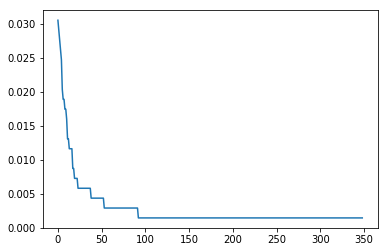

In [85]:
plt.plot(sorted([v for k, v in doc_perc_2.items()], key=lambda x: x, reverse=True))
plt.show()

In [93]:
0.030478955007256895/3

0.010159651669085631

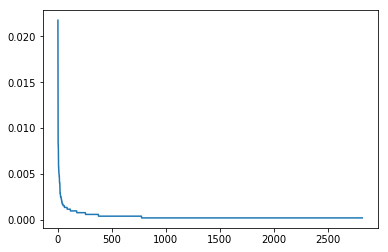

In [86]:
plt.plot(sorted([v for k, v in doc_perc_1.items()], key=lambda x: x, reverse=True))
plt.show()

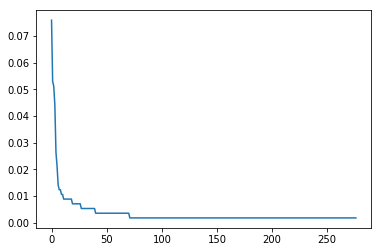

In [87]:
plt.plot(sorted([v for k, v in doc_perc_3.items()], key=lambda x: x, reverse=True))
plt.show()

In [ ]:
# same_doc = []
# same_para = []
# same_sent = []

# doc_inter = set(mentions_1.keys()).intersection(set(mentions_2.keys())).intersection(set(mentions_3.keys()))

# for did in doc_inter:
#     para_inter = set(mentions_1[did].keys()).intersection(set(mentions_2[did].keys())).intersection(set(mentions_3[did].keys()))
#     if para_inter == set():
#         same_doc.append(did)
#     else:
#         for pid in para_inter:
#             sent_inter = mentions_1[did][pid].intersection(mentions_2[did][pid]).intersection(mentions_3[did][pid])
#             if sent_inter == set():
#                 same_para.append(did + '-' + pid)
#             else:
#                 for sid in sent_inter:
#                     same_sent.append(did + '-' + pid + '-' + sid)
# print(same_doc)
# print(same_para)
# print(same_sent)